In [1]:
import pandas as pd

# long data 만들기

- 각 변수는 하나의 컬럼의 배치
- 각 관측치는 한행에 1건씩 분리되어 배치
- 각 값은 개별 셀에 배치
- melt()
- pivot()
- pivot_table(): 집계 함수를 적용

In [2]:
df = pd.read_csv('./data/pew.csv')
type(df)

pandas.core.frame.DataFrame

In [3]:
df.columns

Index(['religion', '<$10k', '$10-20k', '$20-30k', '$30-40k', '$40-50k',
       '$50-75k', '$75-100k', '$100-150k', '>150k', 'Don't know/refused'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   religion            18 non-null     object
 1   <$10k               18 non-null     int64 
 2   $10-20k             18 non-null     int64 
 3   $20-30k             18 non-null     int64 
 4   $30-40k             18 non-null     int64 
 5   $40-50k             18 non-null     int64 
 6   $50-75k             18 non-null     int64 
 7   $75-100k            18 non-null     int64 
 8   $100-150k           18 non-null     int64 
 9   >150k               18 non-null     int64 
 10  Don't know/refused  18 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 1.7+ KB


In [5]:
df.head(2)

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76


In [6]:
df.melt(id_vars='religion').sort_values('religion').head(18)

,religion,variable,value
0,Agnostic,<$10k,27
144,Agnostic,>150k,84
162,Agnostic,Don't know/refused,96
126,Agnostic,$100-150k,109
36,Agnostic,$20-30k,60
108,Agnostic,$75-100k,122
18,Agnostic,$10-20k,34
90,Agnostic,$50-75k,137
72,Agnostic,$40-50k,76
54,Agnostic,$30-40k,81


In [7]:
df_melt = df.melt(id_vars='religion')
df_melt

,religion,variable,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [8]:
df_melt['religion']

0                   Agnostic
1                    Atheist
2                   Buddhist
3                   Catholic
4         Don’t know/refused
               ...          
175                 Orthodox
176          Other Christian
177             Other Faiths
178    Other World Religions
179             Unaffiliated
Name: religion, Length: 180, dtype: object

In [9]:
cond = df_melt['religion'] == 'Agnostic'

In [10]:
df_melt.loc[cond]

,religion,variable,value
0,Agnostic,<$10k,27
18,Agnostic,$10-20k,34
36,Agnostic,$20-30k,60
54,Agnostic,$30-40k,81
72,Agnostic,$40-50k,76
90,Agnostic,$50-75k,137
108,Agnostic,$75-100k,122
126,Agnostic,$100-150k,109
144,Agnostic,>150k,84
162,Agnostic,Don't know/refused,96


In [11]:
df_melt_rename = df_melt.rename(columns={'variable':'income', 'value':'count'})

In [12]:
df_melt_rename

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [13]:
df_melt_new = df.melt(id_vars='religion', var_name= 'income', value_name='count')
df_melt_new

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [14]:
df_pivot = df_melt_new.pivot(  #long data > wide data
    index='religion',
    columns='income',
    values='count'
).reset_index()

In [15]:
df_pivot

income,religion,$10-20k,$100-150k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,<$10k,>150k,Don't know/refused
0,Agnostic,34,109,60,81,76,137,122,27,84,96
1,Atheist,27,59,37,52,35,70,73,12,74,76
2,Buddhist,21,39,30,34,33,58,62,27,53,54
3,Catholic,617,792,732,670,638,1116,949,418,633,1489
4,Don’t know/refused,14,17,15,11,10,35,21,15,18,116
5,Evangelical Prot,869,723,1064,982,881,1486,949,575,414,1529
6,Hindu,9,48,7,9,11,34,47,1,54,37
7,Historically Black Prot,244,81,236,238,197,223,131,228,78,339
8,Jehovah's Witness,27,11,24,24,21,30,15,20,6,37
9,Jewish,19,87,25,25,30,95,69,19,151,162


In [16]:

df_pivot = df_melt_new.pivot_table(
    index='religion',
    columns='income',
    values='count',
    aggfunc='min'
)
df_pivot

income,$10-20k,$100-150k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,<$10k,>150k,Don't know/refused
religion,,,,,,,,,,
Agnostic,34,109,60,81,76,137,122,27,84,96
Atheist,27,59,37,52,35,70,73,12,74,76
Buddhist,21,39,30,34,33,58,62,27,53,54
Catholic,617,792,732,670,638,1116,949,418,633,1489
Don’t know/refused,14,17,15,11,10,35,21,15,18,116
Evangelical Prot,869,723,1064,982,881,1486,949,575,414,1529
Hindu,9,48,7,9,11,34,47,1,54,37
Historically Black Prot,244,81,236,238,197,223,131,228,78,339
Jehovah's Witness,27,11,24,24,21,30,15,20,6,37


In [17]:

billboard_df = pd.read_csv('./data/billboard.csv')
billboard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 81 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          317 non-null    int64  
 1   artist        317 non-null    object 
 2   track         317 non-null    object 
 3   time          317 non-null    object 
 4   date.entered  317 non-null    object 
 5   wk1           317 non-null    int64  
 6   wk2           312 non-null    float64
 7   wk3           307 non-null    float64
 8   wk4           300 non-null    float64
 9   wk5           292 non-null    float64
 10  wk6           280 non-null    float64
 11  wk7           269 non-null    float64
 12  wk8           260 non-null    float64
 13  wk9           253 non-null    float64
 14  wk10          244 non-null    float64
 15  wk11          236 non-null    float64
 16  wk12          222 non-null    float64
 17  wk13          210 non-null    float64
 18  wk14          204 non-null    

In [18]:

billboard_df.head(2)

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:

billboard_df.columns

Index(['year', 'artist', 'track', 'time', 'date.entered', 'wk1', 'wk2', 'wk3',
       'wk4', 'wk5', 'wk6', 'wk7', 'wk8', 'wk9', 'wk10', 'wk11', 'wk12',
       'wk13', 'wk14', 'wk15', 'wk16', 'wk17', 'wk18', 'wk19', 'wk20', 'wk21',
       'wk22', 'wk23', 'wk24', 'wk25', 'wk26', 'wk27', 'wk28', 'wk29', 'wk30',
       'wk31', 'wk32', 'wk33', 'wk34', 'wk35', 'wk36', 'wk37', 'wk38', 'wk39',
       'wk40', 'wk41', 'wk42', 'wk43', 'wk44', 'wk45', 'wk46', 'wk47', 'wk48',
       'wk49', 'wk50', 'wk51', 'wk52', 'wk53', 'wk54', 'wk55', 'wk56', 'wk57',
       'wk58', 'wk59', 'wk60', 'wk61', 'wk62', 'wk63', 'wk64', 'wk65', 'wk66',
       'wk67', 'wk68', 'wk69', 'wk70', 'wk71', 'wk72', 'wk73', 'wk74', 'wk75',
       'wk76'],
      dtype='object')

In [20]:

id_vars = billboard_df.columns[:5].tolist()
id_vars

['year', 'artist', 'track', 'time', 'date.entered']

In [21]:

b_df_melt  = billboard_df.melt(id_vars=id_vars, var_name= 'week', value_name='rank')
b_df_melt

,year,artist,track,time,date.entered,week,rank
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN


# apply()

In [22]:
df = pd.DataFrame(
  {
    "a":[10,20,30],
    "b":[20,30,40]
  }
)
df

,a,b
0,10,20
1,20,30
2,30,40


In [23]:
df**2

,a,b
0,100,400
1,400,900
2,900,1600


In [24]:
df/10

,a,b
0,1.0,2.0
1,2.0,3.0
2,3.0,4.0


In [25]:
def make_sq(x, e=2):
  return x ** e

In [26]:
df.apply(make_sq, e=3)

,a,b
0,1000,8000
1,8000,27000
2,27000,64000


In [27]:
import pandas as pd

data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [25, 45, 35, 32, 28],
    'Salary': [5000, 7000, 6500, 5500, 6000]
}
sal_df = pd.DataFrame(data)
sal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    5 non-null      object
 1   Age     5 non-null      int64 
 2   Salary  5 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 248.0+ bytes


In [28]:
def age_category(age):
  if age<30 :
    return '20대'
  elif age<40 :
    return '30대'
  else:
    return '40대 이상'

In [29]:
sal_df['Age_category'] = sal_df["Age"].apply(age_category)

In [30]:
sal_df

,Name,Age,Salary,Age_category
0,Alice,25,5000,20대
1,Bob,45,7000,40대 이상
2,Charlie,35,6500,30대
3,David,32,5500,30대
4,Eva,28,6000,20대


# 데이터 병합

In [31]:
import pandas as pd

In [33]:
#dataframe 생성
df_1 = pd.read_csv('./data/concat_1.csv')
df_2 = pd.read_csv('./data/concat_2.csv')
df_3 = pd.read_csv('./data/concat_3.csv')

In [34]:
# column list 가 동일 > 병합
total_df = pd.concat([df_1, df_2, df_3], ignore_index=True)
#total_df.loc[3]
total_df

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


In [35]:
add_ser = pd.Series(['a100', 'b100', 'c100', 'd100'])
add_ser

0    a100
1    b100
2    c100
3    d100
dtype: object

In [36]:
total_df_add = pd.concat([total_df, add_ser])

In [37]:
col_list = total_df.columns.to_list()

In [38]:
empty_df = pd.DataFrame( columns = col_list)
empty_df

,A,B,C,D


In [39]:
add_ser.index = empty_df.columns

In [40]:
add_ser

A    a100
B    b100
C    c100
D    d100
dtype: object

In [41]:
empty_df.loc[0] = add_ser
empty_df

,A,B,C,D
0,a100,b100,c100,d100


In [42]:
new_total_df = pd.concat([total_df, empty_df], ignore_index = True)
new_total_df

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


## merge()
- 키를 기준으로 합친다
- sql에서 join

In [45]:
import pandas as pd

In [46]:
sales_data = pd.DataFrame({ 'CustomerID': [101, 102, 103, 104], 'Date': ['2023-01-01', '2023-01-03', '2023-01-05', '2023-01-07'], 'Amount': [250, 300, 150, 400] })

In [47]:
customer_data = pd.DataFrame({ 'CustomerID': [101, 102, 103, 105], 'Name': ['Alice', 'Bob', 'Charlie', 'Eva'], 'Region': ['North', 'South', 'East', 'West'] })

In [48]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  4 non-null      int64 
 1   Date        4 non-null      object
 2   Amount      4 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 224.0+ bytes


In [49]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  4 non-null      int64 
 1   Name        4 non-null      object
 2   Region      4 non-null      object
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes


In [50]:
pd.merge(customer_data, sales_data, on='CustomerID')

,CustomerID,Name,Region,Date,Amount
0,101,Alice,North,2023-01-01,250
1,102,Bob,South,2023-01-03,300
2,103,Charlie,East,2023-01-05,150


In [52]:
pd.merge(customer_data, sales_data,how='left', on='CustomerID')

,CustomerID,Name,Region,Date,Amount
0,101,Alice,North,2023-01-01,250.0
1,102,Bob,South,2023-01-03,300.0
2,103,Charlie,East,2023-01-05,150.0
3,105,Eva,West,NaN,NaN


In [53]:
pd.merge(customer_data, sales_data,how='right', on='CustomerID')

,CustomerID,Name,Region,Date,Amount
0,101,Alice,North,2023-01-01,250
1,102,Bob,South,2023-01-03,300
2,103,Charlie,East,2023-01-05,150
3,104,NaN,NaN,2023-01-07,400


In [54]:
pd.merge(customer_data, sales_data,how='inner', on='CustomerID')

,CustomerID,Name,Region,Date,Amount
0,101,Alice,North,2023-01-01,250
1,102,Bob,South,2023-01-03,300
2,103,Charlie,East,2023-01-05,150


In [55]:
pd.merge(customer_data, sales_data,how='outer', on='CustomerID')

,CustomerID,Name,Region,Date,Amount
0,101,Alice,North,2023-01-01,250.0
1,102,Bob,South,2023-01-03,300.0
2,103,Charlie,East,2023-01-05,150.0
3,104,NaN,NaN,2023-01-07,400.0
4,105,Eva,West,NaN,NaN


how - 병합 기준 지정
- left
- right
- inner(default)
- outer

on - 병합을 위한 key 지정

# 그룹 연산

groupby() + aggregation (집계)

In [56]:
gap_df = pd.read_csv('./data/gapminder.tsv', sep='\t')
gap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [57]:
gap_df.head(3)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710


In [58]:
gap_df.tail(5)

,country,continent,year,lifeExp,pop,gdpPercap
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [62]:
gap_df.country.unique().shape

(142,)

In [61]:
gap_df.loc[:,"country"]

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object

In [63]:
gap_df.year.unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007])

In [64]:
gap_df.continent.unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [69]:
gap_df.groupby('country')[['lifeExp', 'pop']].sum()

,lifeExp,pop
country,,
Afghanistan,449.746,189884585
Albania,821.195,30962990
Algeria,708.362,238504874
Angola,454.602,87712681
Argentina,828.725,343226879
...,...,...
Vietnam,689.754,654822851
West Bank and Gaza,723.944,22183278
"Yemen, Rep.",561.365,130118302


In [70]:
gap_df.groupby('country').get_group('Afghanistan')

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


In [75]:
gap_df.groupby('continent')['country'].count()/12

continent
Africa      52.0
Americas    25.0
Asia        33.0
Europe      30.0
Oceania      2.0
Name: country, dtype: float64

count(), size(), mean(), std(), quantile(), max(), min(), sum(), var(), describe()

In [83]:
gap_df.groupby('country')['lifeExp'].mean()

country
Afghanistan           37.478833
Albania               68.432917
Algeria               59.030167
Angola                37.883500
Argentina             69.060417
                        ...    
Vietnam               57.479500
West Bank and Gaza    60.328667
Yemen, Rep.           46.780417
Zambia                45.996333
Zimbabwe              52.663167
Name: lifeExp, Length: 142, dtype: float64

In [6]:
import pandas as pd
veh_df = pd.read_csv('./data/vehicle_prod.csv')
veh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6 non-null      object 
 1   2007        6 non-null      float64
 2   2008        6 non-null      float64
 3   2009        6 non-null      float64
 4   2010        6 non-null      float64
 5   2011        6 non-null      float64
dtypes: float64(5), object(1)
memory usage: 416.0+ bytes


In [7]:
veh_df.rename(columns= {'Unnamed: 0':'country'}, inplace=True)
veh_df

,country,2007,2008,2009,2010,2011
0,China,7.71,7.95,11.96,15.84,16.33
1,EU,19.02,17.71,15.00,16.70,17.48
2,US,10.47,8.45,5.58,7.60,8.40
3,Japan,10.87,10.83,7.55,9.09,7.88
4,Korea,4.04,3.78,3.45,4.20,4.62
5,Mexico,2.01,2.05,1.50,2.25,2.54


In [23]:
veh_df.set_index('country', inplace=True)
veh_df

KeyError: "None of ['country'] are in the columns"

In [9]:
type(veh_df['2007'])

pandas.core.series.Series

In [11]:
veh_df[['2007']]

,2007
country,
China,7.71
EU,19.02
US,10.47
Japan,10.87
Korea,4.04
Mexico,2.01


In [13]:
veh_df.describe()

,2007,2008,2009,2010,2011
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,9.020000,8.461667,7.506667,9.280000,9.541667
std,6.019661,5.557519,5.142621,5.935921,6.105887
min,2.010000,2.050000,1.500000,2.250000,2.540000
25%,4.957500,4.822500,3.982500,5.050000,5.435000
50%,9.090000,8.200000,6.565000,8.345000,8.140000
75%,10.770000,10.235000,10.857500,14.152500,14.347500
max,19.020000,17.710000,15.000000,16.700000,17.480000


In [15]:
veh_df.corr()

,2007,2008,2009,2010,2011
2007,1.000000,0.991073,0.831447,0.769040,0.758271
2008,0.991073,1.000000,0.872296,0.810529,0.789512
2009,0.831447,0.872296,1.000000,0.988513,0.980025
2010,0.769040,0.810529,0.988513,1.000000,0.992667
2011,0.758271,0.789512,0.980025,0.992667,1.000000


In [16]:
veh_df.sum()

2007    54.12
2008    50.77
2009    45.04
2010    55.68
2011    57.25
dtype: float64

In [18]:
# 총 생산량 컬럼 추가 하기
veh_df['total_production'] = veh_df.sum(axis=1)

In [19]:
veh_df

,2007,2008,2009,2010,2011,total_production
country,,,,,,
China,7.71,7.95,11.96,15.84,16.33,59.79
EU,19.02,17.71,15.00,16.70,17.48,85.91
US,10.47,8.45,5.58,7.60,8.40,40.50
Japan,10.87,10.83,7.55,9.09,7.88,46.22
Korea,4.04,3.78,3.45,4.20,4.62,20.09
Mexico,2.01,2.05,1.50,2.25,2.54,10.35


In [21]:
veh_df['total'] = veh_df.sum()

In [22]:
veh_df

,2007,2008,2009,2010,2011,total_production,total
country,,,,,,,
China,7.71,7.95,11.96,15.84,16.33,59.79,NaN
EU,19.02,17.71,15.00,16.70,17.48,85.91,NaN
US,10.47,8.45,5.58,7.60,8.40,40.50,NaN
Japan,10.87,10.83,7.55,9.09,7.88,46.22,NaN
Korea,4.04,3.78,3.45,4.20,4.62,20.09,NaN
Mexico,2.01,2.05,1.50,2.25,2.54,10.35,NaN


In [24]:
#delete total column
del veh_df['total']

In [25]:
#add total axis
veh_df.loc['total'] = veh_df.sum()
veh_df

,2007,2008,2009,2010,2011,total_production
country,,,,,,
China,7.71,7.95,11.96,15.84,16.33,59.79
EU,19.02,17.71,15.00,16.70,17.48,85.91
US,10.47,8.45,5.58,7.60,8.40,40.50
Japan,10.87,10.83,7.55,9.09,7.88,46.22
Korea,4.04,3.78,3.45,4.20,4.62,20.09
Mexico,2.01,2.05,1.50,2.25,2.54,10.35
total,54.12,50.77,45.04,55.68,57.25,262.86


# 결측치 처리

pd.NA, np.nan

In [27]:
import numpy as np

In [29]:
pd.NA, np.nan

(<NA>, nan)

In [30]:
pd.isnull(np.nan), pd.isnull(pd.NA)

(True, True)

In [28]:
data = {
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'age': [25, np.nan, 30, 22, np.nan],
    'score': [90, 85, np.nan, 88, 95],
    'city': ['Seoul', 'Busan', np.nan, 'Incheon', 'Seoul']
}

In [31]:
data

{'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
 'age': [25, nan, 30, 22, nan],
 'score': [90, 85, nan, 88, 95],
 'city': ['Seoul', 'Busan', nan, 'Incheon', 'Seoul']}

In [32]:
df = pd.DataFrame(data)

In [33]:
df

,name,age,score,city
0,Alice,25.0,90.0,Seoul
1,Bob,NaN,85.0,Busan
2,Charlie,30.0,NaN,NaN
3,David,22.0,88.0,Incheon
4,Eva,NaN,95.0,Seoul


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    5 non-null      object 
 1   age     3 non-null      float64
 2   score   4 non-null      float64
 3   city    4 non-null      object 
dtypes: float64(2), object(2)
memory usage: 288.0+ bytes


In [36]:
df.isnull().sum()

name     0
age      2
score    1
city     1
dtype: int64

In [37]:
# 0으로 null 을 없앤다.
df.fillna(0)

,name,age,score,city
0,Alice,25.0,90.0,Seoul
1,Bob,0.0,85.0,Busan
2,Charlie,30.0,0.0,0
3,David,22.0,88.0,Incheon
4,Eva,0.0,95.0,Seoul


In [38]:
df['age'].fillna(0)

0    25.0
1     0.0
2    30.0
3    22.0
4     0.0
Name: age, dtype: float64

In [39]:
df['age'].mean()

np.float64(25.666666666666668)

In [40]:
df['age'].fillna(df['age'].mean())

0    25.000000
1    25.666667
2    30.000000
3    22.000000
4    25.666667
Name: age, dtype: float64

In [41]:
df['score'].median()

89.0

In [42]:
df['score'].fillna(df['score'].median())

0    90.0
1    85.0
2    89.0
3    88.0
4    95.0
Name: score, dtype: float64

In [44]:
df['score'].fillna(method='ffill')

C:\Users\Admin\AppData\Local\Temp\ipykernel_6904\3387885858.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['score'].fillna(method='ffill')


0    90.0
1    85.0
2    85.0
3    88.0
4    95.0
Name: score, dtype: float64

In [46]:
titanic_df = pd.read_csv('./data/titanic.csv')
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [47]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [48]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [49]:
# age
titanic_df['Age'].mean(), titanic_df['Age'].median()


(np.float64(29.69911764705882), 28.0)

In [50]:
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


C:\Users\Admin\AppData\Local\Temp\ipykernel_6904\2607116919.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)


In [51]:
titanic_df['Age'].mean()

np.float64(29.36158249158249)

<Axes: ylabel='Frequency'>

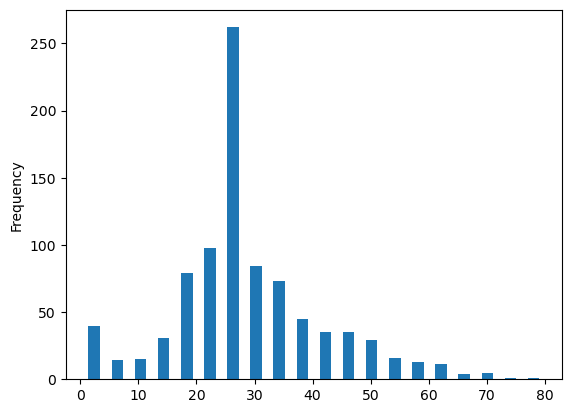

In [57]:
titanic_df['Age'].plot(kind='hist', bins=20, rwidth=0.5)

In [61]:
titanic_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [62]:
titanic_df['Cabin'].fillna('Unknown', inplace= True)

In [63]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Embarked 속성

In [67]:
titanic_df.Embarked

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

# 라벨 인코딩

In [69]:
titanic_df['Sex'].map({'male':0, 'female':1})

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [70]:
pd.get_dummies(titanic_df, columns=['Sex', 'Embarked']).head(1)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.25,Unknown,False,True,False,False,True
